In [2]:
import numpy as np
import pandas as pd
import openml
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

In [3]:
#Distance metric

def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

def weightedEuclidean(point, data):
    weighted_point = point * importances
    weighted_data = data * importances
    return np.sqrt(np.sum((weighted_point - weighted_data)**2, axis=1))

In [4]:
#Naive knn

class knnNaive:
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric   
        
    def most_common(self, lst):
        return max(set(lst), key=lst.count)
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train    
    
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])       
        return list(map(self.most_common, neighbors))    
    
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

In [5]:
#knn Weighted (1/dist)

class knnWeighted:
    def __init__(self, k=5, dist_metric=euclidean, normalized=False):
        self.k = k
        self.dist_metric = dist_metric
        self.normalized = normalized
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train    
        
    def find_res(self, data):
        result = {}
        for dist, cls in data:
            if cls not in result:
                result[cls] = {'weighted_dist': 0.0, 'num_elems': 0}
            weidist=1.0/(dist+0.000001)
            if weidist>1000: wwidist=1000
            result[cls]['weighted_dist'] += weidist
            result[cls]['num_elems'] += 1
        
        if (self.normalized == True):
            total_num_elems = sum([stats['num_elems'] for stats in result.values()])
            num_classes = len(result)
            avg_num_elems = total_num_elems / num_classes

            for cls, stats in result.items():
                mult=avg_num_elems/stats['num_elems']
                stats['weighted_dist']=stats['weighted_dist']*mult
        
        res = None
        max_weighted_dist = -float('inf')
        for cls, stats in result.items():
            if stats['weighted_dist'] > max_weighted_dist:
                res = cls
                max_weighted_dist = stats['weighted_dist']
        return res
    
    def predict(self, X_test):
        res = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            kn = sorted(zip(distances, self.y_train))[:self.k]
            res.append(self.find_res(kn))
        return res   
    
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

In [6]:
#knn Weighted (gaussian)

class knnGaussian:
    def __init__(self, k=5, dist_metric=euclidean, normalized=False, sigma=1):
        self.k = k
        self.dist_metric = dist_metric  
        self.normalized = normalized
        self.sigma = sigma
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train    

    def find_res_gaussian(self, data):
        result = {}
        for dist, cls in data:
            if cls not in result:
                result[cls] = {'weighted_dist': 0.0, 'num_elems': 0}
            weight = np.exp(-(dist ** 2) / (2 * self.sigma ** 2))
            result[cls]['weighted_dist'] += weight
            result[cls]['num_elems'] += 1
            
        if (self.normalized == True):
            total_num_elems = sum([stats['num_elems'] for stats in result.values()])
            num_classes = len(result)
            avg_num_elems = total_num_elems / num_classes

            for cls, stats in result.items():
                mult=avg_num_elems/stats['num_elems']
                stats['weighted_dist']=stats['weighted_dist']*mult
            
        res = None
        max_weighted_dist = -float('inf')
        for cls, stats in result.items():
            if stats['weighted_dist'] > max_weighted_dist:
                res = cls
                max_weighted_dist = stats['weighted_dist']
        return res

    def predict(self, X_test):
        res = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            kn = sorted(zip(distances, self.y_train))[:self.k]
            res.append(self.find_res_gaussian(kn))
        return res   
    
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

In [16]:
#Data sets

#wine = fetch_openml(data_id=40691) #https://www.openml.org/search?type=data&sort=runs&status=active&id=40691
#data.append(wine)
#iris = fetch_openml(data_id=61) #https://www.openml.org/search?type=data&sort=runs&status=active&id=61
#data.append(iris)
#glass = fetch_openml(data_id=41) #https://www.openml.org/search?type=data&sort=runs&status=active&id=41
#data.append(glass)

#dt4 = fetch_openml(data_id=187)
#data.append(dt4)
#dt5 = fetch_openml(data_id=37)
#data.append(dt5)
#dt6 = fetch_openml(data_id=54)
#data.append(dt6)
data = []
dt7 = fetch_openml(data_id=40691, parser='auto')
data.append(dt7)

Encoding done
Importances done
knn done
knnNA done
knnW done
knnWN done
knnWA done
knnWAN done
knnG done
knnGN done
knnGA done
k= 1  done
knn done
knnNA done
knnW done
knnWN done
knnWA done
knnWAN done
knnG done
knnGN done
knnGA done
k= 2  done
knn done
knnNA done
knnW done
knnWN done
knnWA done
knnWAN done
knnG done
knnGN done
knnGA done
k= 3  done
knn done
knnNA done
knnW done
knnWN done
knnWA done
knnWAN done
knnG done
knnGN done
knnGA done
k= 4  done
knn done
knnNA done
knnW done
knnWN done
knnWA done
knnWAN done
knnG done
knnGN done
knnGA done
k= 5  done
knn done
knnNA done
knnW done
knnWN done
knnWA done
knnWAN done
knnG done
knnGN done
knnGA done
k= 6  done
knn done
knnNA done
knnW done
knnWN done
knnWA done
knnWAN done
knnG done
knnGN done
knnGA done
k= 7  done
knn done
knnNA done
knnW done
knnWN done
knnWA done
knnWAN done
knnG done
knnGN done
knnGA done
k= 8  done
knn done
knnNA done
knnW done
knnWN done
knnWA done
knnWAN done
knnG done
knnGN done
knnGA done
k= 9  done
knn do

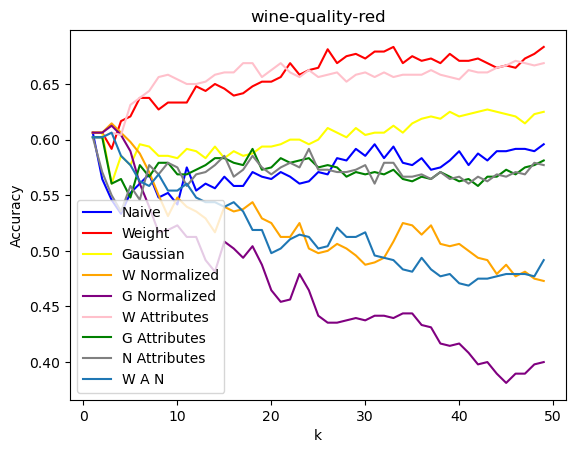

knnN=0.572874, knnNA=0.570578, knnW=0.655867, knnWN=0.523342, knnWA=0.653997, knnWAN=0.517985, knnG=0.603104, knnGN=0.469260, knnGA=0.573299


In [17]:
#Some tests

for dataset in data:
    
    #Preprocess data
    X = dataset['data']
    y = dataset['target']
    X = X[0:2000]
    y = y[0:2000]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    label_encoder = LabelEncoder()
    label_encoder.fit(y_train)
    y_train_encoded = label_encoder.transform(y_train)
    print("Encoding done")
    
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train_encoded)
    importances = rf.feature_importances_
    print("Importances done")

    ss = StandardScaler().fit(X_train)
    X_train, X_test = ss.transform(X_train), ss.transform(X_test)
    
    #Store the accuracies
    accuracies_naive = []
    accuracies_naiveatt = []
    accuracies_wei = []
    accuracies_weinorm = []
    accuracies_weiatt = []
    accuracies_weiattnorm = []
    accuracies_gaus = []
    accuracies_gausnorm = []
    accuracies_gausatt = []
    
    # Test knn models across varying ks
    ks = range(1,50)
    for k in ks:
        
        #Naive knn
        knnN = knnNaive(k=k)
        knnN.fit(X_train, y_train)
        accuracy = knnN.evaluate(X_test, y_test)
        print("knn done")
        accuracies_naive.append(accuracy)
        
        #Naive knn Attributes
        knnNA = knnNaive(k=k, dist_metric=weightedEuclidean)
        knnNA.fit(X_train, y_train)
        accuracy = knnNA.evaluate(X_test, y_test)
        print("knnNA done")
        accuracies_naiveatt.append(accuracy)

        #knn Weighted (1/dist)
        knnW = knnWeighted(k=k)
        knnW.fit(X_train, y_train)
        accuracy = knnW.evaluate(X_test, y_test)
        print("knnW done")
        accuracies_wei.append(accuracy)
        
        #knn Weighted (1/dist) Normalized
        knnWN = knnWeighted(k=k, normalized=True)
        knnWN.fit(X_train, y_train)
        accuracy = knnWN.evaluate(X_test, y_test)
        print("knnWN done")
        accuracies_weinorm.append(accuracy)
        
        #knn Weighted (1/dist) Attributes
        knnWA = knnWeighted(k=k, dist_metric=weightedEuclidean)
        knnWA.fit(X_train, y_train)
        accuracy = knnWA.evaluate(X_test, y_test)
        print("knnWA done")
        accuracies_weiatt.append(accuracy)
        
        #knn Weighted (1/dist) Attributes Normalized
        knnWAN = knnWeighted(k=k, dist_metric=weightedEuclidean, normalized=True)
        knnWAN.fit(X_train, y_train)
        accuracy = knnWAN.evaluate(X_test, y_test)
        print("knnWAN done")
        accuracies_weiattnorm.append(accuracy)
        
        #knn Weighted (gaussian)
        knnG = knnGaussian(k=k)
        knnG.fit(X_train, y_train)
        accuracy = knnG.evaluate(X_test, y_test)
        print("knnG done")
        accuracies_gaus.append(accuracy)
        
        #knn Weighted (gaussian) Normalized
        knnGN = knnGaussian(k=k, normalized=True)
        knnGN.fit(X_train, y_train)
        accuracy = knnGN.evaluate(X_test, y_test)
        print("knnGN done")
        accuracies_gausnorm.append(accuracy)
        
        #knn Weighted (gaussian) Attributes
        knnGA = knnGaussian(k=k, dist_metric=weightedEuclidean)
        knnGA.fit(X_train, y_train)
        accuracy = knnGA.evaluate(X_test, y_test)
        print("knnGA done")
        accuracies_gausatt.append(accuracy)
    
        print("k=", k, " done")
    #Results
    name = dataset['details']['name']
    print(f"\n{name} dataset:")
    
    #Plot the results
    fig, ax = plt.subplots()
    ax.plot(ks, accuracies_naive, color="blue", label="Naive")
    ax.plot(ks, accuracies_wei, color="red", label="Weight")
    ax.plot(ks, accuracies_gaus, color="yellow", label="Gaussian")
    ax.plot(ks, accuracies_weinorm, color="orange", label="W Normalized")
    ax.plot(ks, accuracies_gausnorm, color="purple", label="G Normalized")
    ax.plot(ks, accuracies_weiatt, color="pink", label="W Attributes")
    ax.plot(ks, accuracies_gausatt, color="green", label="G Attributes")
    ax.plot(ks, accuracies_naiveatt, color="grey", label="N Attributes")
    ax.plot(ks, accuracies_weiattnorm, label="W A N")
    ax.set(xlabel="k",
           ylabel="Accuracy",
           title=str(name))
    ax.legend()
    plt.show()
    
    #Print the avg accuracies
    avg_naive = sum(accuracies_naive) / len(accuracies_naive)
    avg_wei = sum(accuracies_wei) / len(accuracies_wei)
    avg_gaus = sum(accuracies_gaus) / len(accuracies_gaus)
    avg_weinorm = sum(accuracies_weinorm) / len(accuracies_weinorm)   
    avg_gausnorm = sum(accuracies_gausnorm) / len(accuracies_gausnorm)
    avg_naiveatt = sum(accuracies_naiveatt) / len(accuracies_naiveatt)
    avg_weiatt = sum(accuracies_weiatt) / len(accuracies_weiatt) 
    avg_weiattnorm = sum(accuracies_weiattnorm) / len(accuracies_weiattnorm) 
    avg_gausatt = sum(accuracies_gausatt) / len(accuracies_gausatt)
    
    print(f"knnN={avg_naive:.6f}, knnNA={avg_naiveatt:.6f}, knnW={avg_wei:.6f}, knnWN={avg_weinorm:.6f}, knnWA={avg_weiatt:.6f}, knnWAN={avg_weiattnorm:.6f}, knnG={avg_gaus:.6f}, knnGN={avg_gausnorm:.6f}, knnGA={avg_gausatt:.6f}")
